# **Import the libraries**

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

**Read the data**

In [2]:
df=pd.read_csv("/kaggle/input/hr-analytics/aug_train.csv")

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
df.shape

(19158, 14)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
enrollee_id,19158.0,16875.358179,9616.292592,1.000,8554.25,16982.500,25169.75,33380.000
city_development_index,19158.0,0.828848,0.123362,0.448,0.74,0.903,0.92,0.949
training_hours,19158.0,65.366896,60.058462,1.000,23.00,47.000,88.00,336.000
target,19158.0,0.249348,0.432647,0.000,0.00,0.000,0.00,1.000


In [6]:
df.target.value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

In [7]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

In [10]:
df.corr()

,enrollee_id,city_development_index,training_hours,target
enrollee_id,1.000000,-0.040455,0.000998,0.049475
city_development_index,-0.040455,1.000000,0.001920,-0.341665
training_hours,0.000998,0.001920,1.000000,-0.021577
target,0.049475,-0.341665,-0.021577,1.000000


# **Data Visulaisation**

<AxesSubplot:>

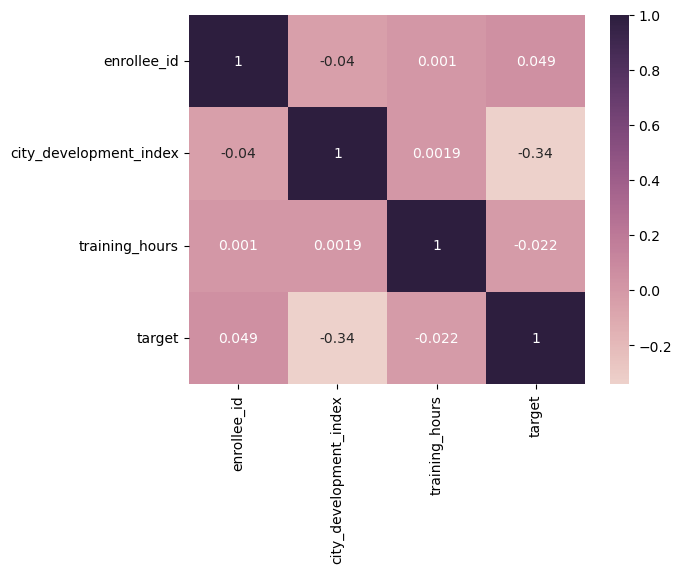

In [11]:
sns.heatmap(df.corr(),annot=True,cmap=sns.cubehelix_palette(as_cmap=True))

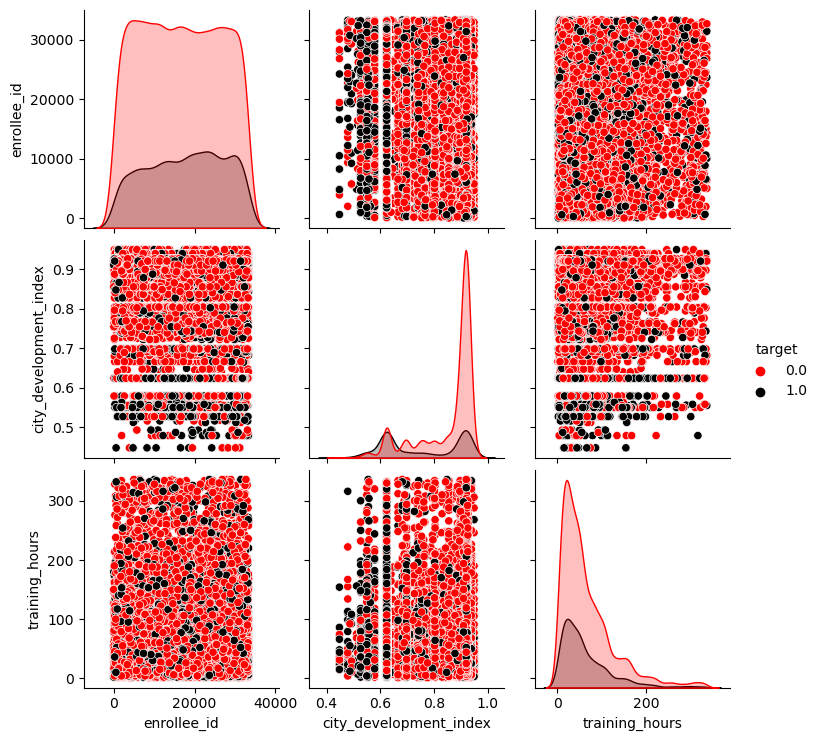

In [12]:
sns.pairplot(df,hue="target",palette=["red","black"])

<AxesSubplot:xlabel='city_development_index', ylabel='Density'>

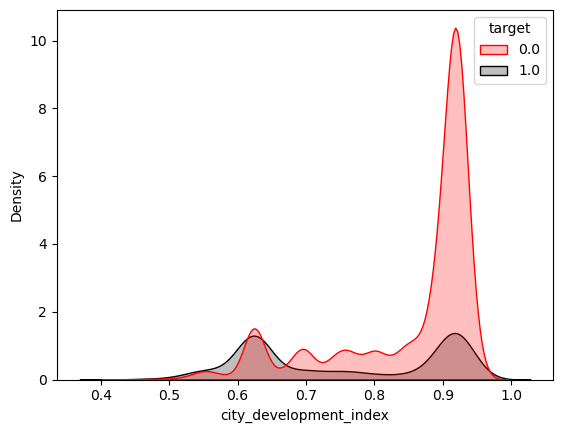

In [13]:
sns.kdeplot(data=df,x="city_development_index",hue="target",fill=True,palette=["red","black"])

<AxesSubplot:xlabel='training_hours', ylabel='Density'>

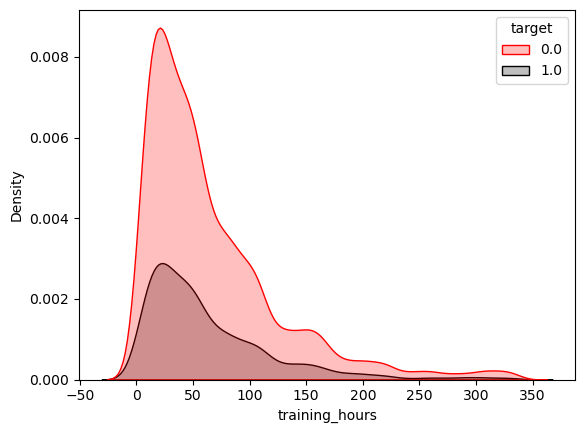

In [14]:
sns.kdeplot(data=df,x="training_hours",hue="target",fill=True,palette=["red","black"])

In [15]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

Text(0.5, 0, 'Training_hours')

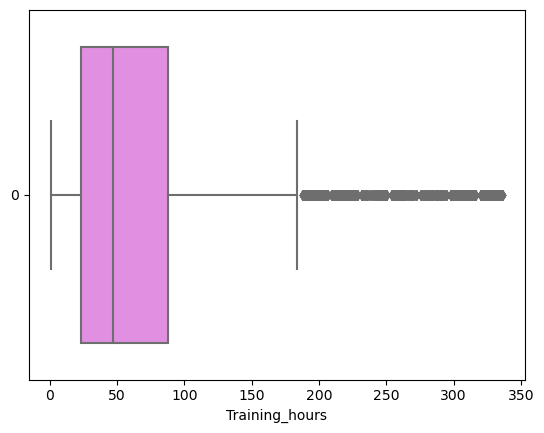

In [16]:
plt.figure()
sns.boxplot(df["training_hours"],orient="h",palette=["violet"])
plt.xlabel("Training_hours")

Text(0.5, 0, 'City_development_index')

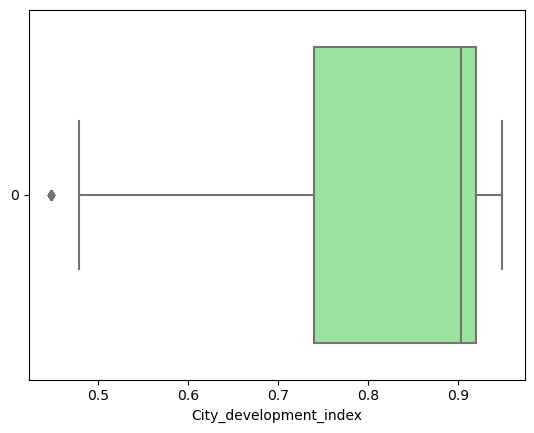

In [17]:
plt.figure()
sns.boxplot(df.city_development_index,orient="h",palette=["#90EE90"])
plt.xlabel("City_development_index")

Text(0, 0.5, 'Counts')

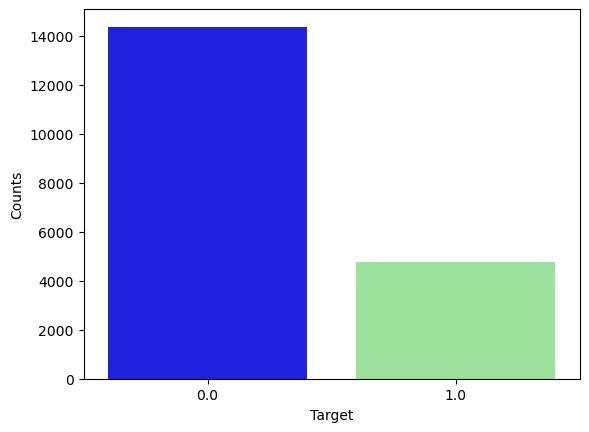

In [18]:
a=df.target.value_counts()
plt.figure()
sns.barplot(x=a.index,y=a.values,palette=["blue","#90EE90"])
plt.xlabel("Target")
plt.ylabel("Counts")

<AxesSubplot:>

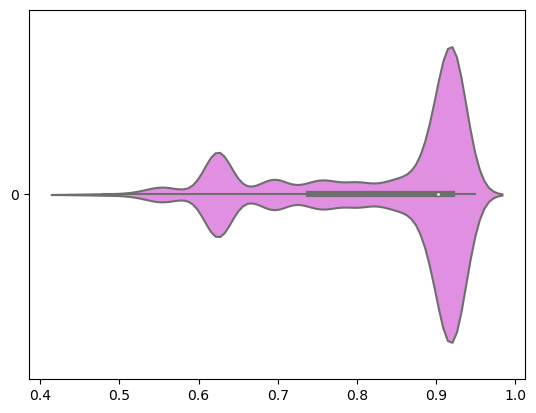

In [19]:
sns.violinplot(df.city_development_index,orient="h",palette=["violet"])

<AxesSubplot:>

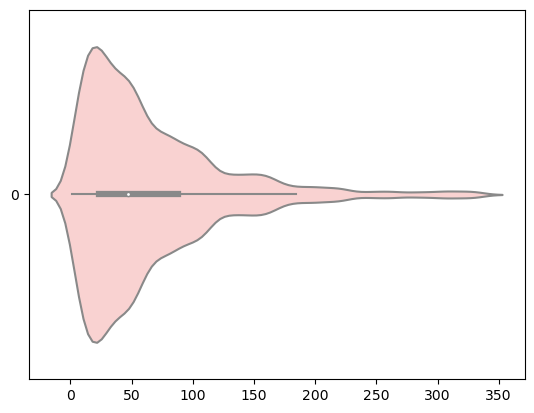

In [20]:
sns.violinplot(df.training_hours,orient="h",palette=["#FFCCCB"])

In [21]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [22]:
df.gender.dtype

dtype('O')

In [23]:
cat_columns=[column for column in df.columns if df[column].dtype=="object"]

In [24]:
cat_columns

['city',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

# **Handling the missing data**

In [25]:
for column in cat_columns:
    if df[column].isnull().sum()>0:
        df[column].replace(np.nan,df[column].mode()[0],inplace=True)

In [26]:
df.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [27]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,83,0.0
3,33241,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,<1,50-99,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,50-99,Pvt Ltd,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,STEM,<1,500-999,Pvt Ltd,2,97,0.0


<AxesSubplot:xlabel='enrolled_university', ylabel='count'>

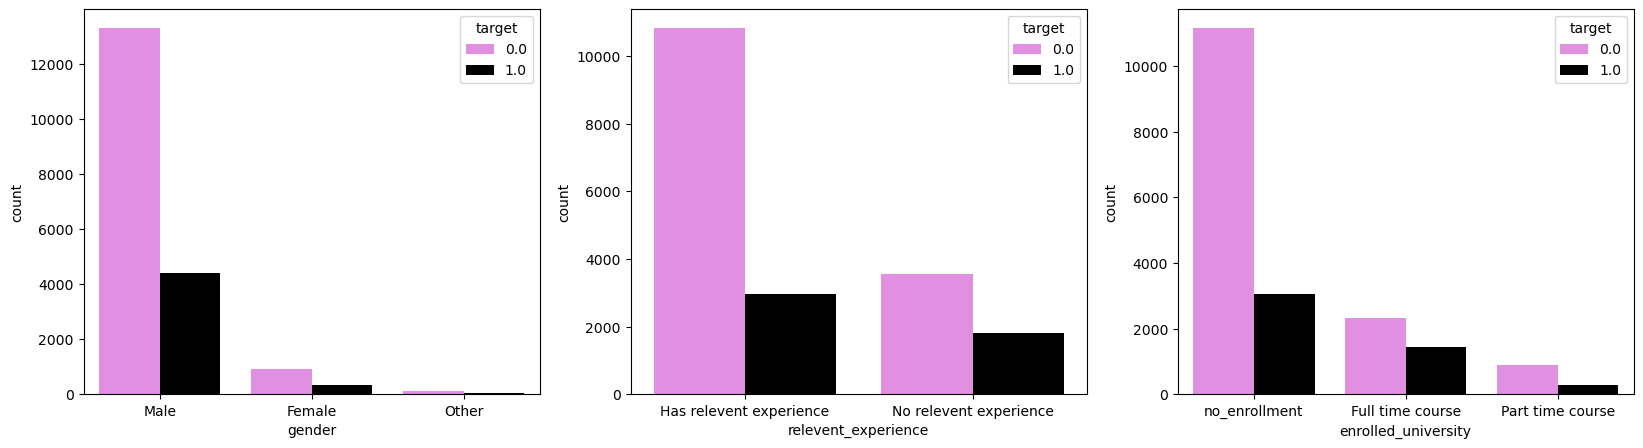

In [28]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,5))
sns.countplot(x="gender",data=df,hue="target",ax=ax1,palette=["violet","black"])
sns.countplot(x="relevent_experience",data=df,hue="target",ax=ax2,palette=["violet","black"])
sns.countplot(x="enrolled_university",data=df,hue="target",ax=ax3,palette=["violet","black"])

[Text(0, 0, '>20'),
 Text(1, 0, '5'),
 Text(2, 0, '4'),
 Text(3, 0, '3'),
 Text(4, 0, '6'),
 Text(5, 0, '2'),
 Text(6, 0, '7'),
 Text(7, 0, '10'),
 Text(8, 0, '9'),
 Text(9, 0, '8'),
 Text(10, 0, '15'),
 Text(11, 0, '11'),
 Text(12, 0, '14'),
 Text(13, 0, '1'),
 Text(14, 0, '<1'),
 Text(15, 0, '16'),
 Text(16, 0, '12'),
 Text(17, 0, '13'),
 Text(18, 0, '17'),
 Text(19, 0, '19'),
 Text(20, 0, '18'),
 Text(21, 0, '20')]

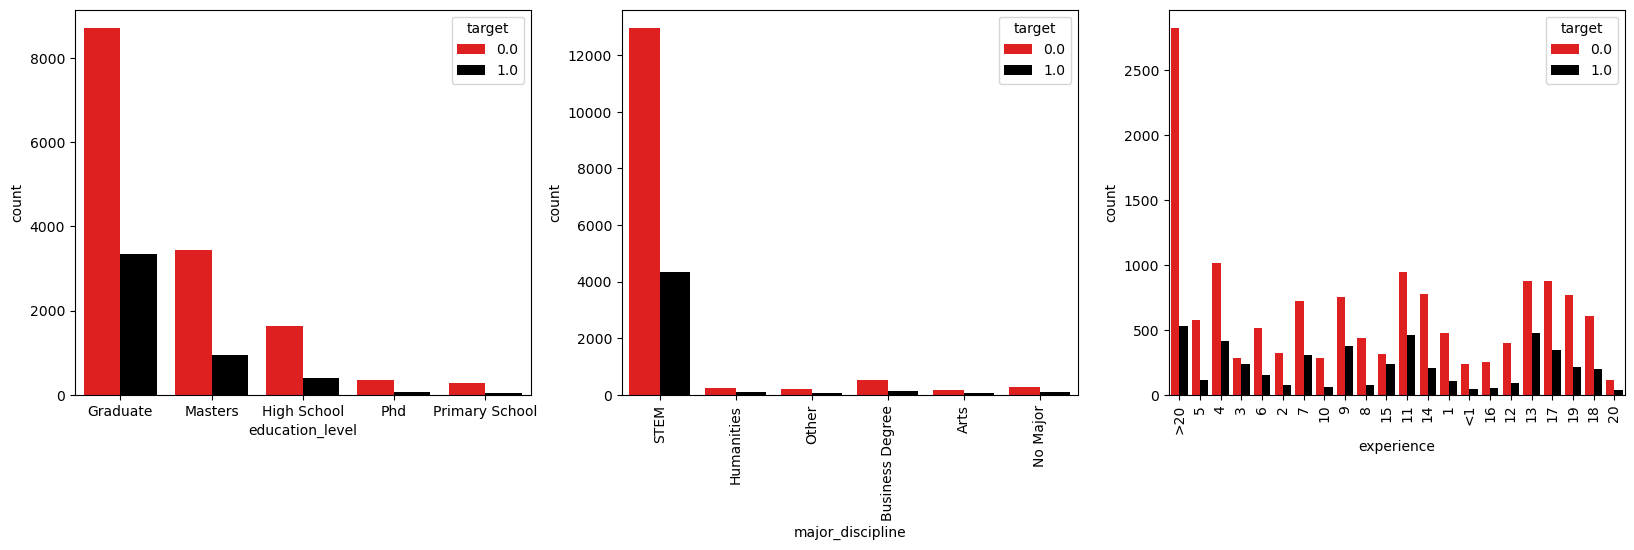

In [29]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,5))
sns.countplot(x="education_level",data=df,hue="target",ax=ax1,palette=["red","black"])
sns.countplot(x="major_discipline",data=df,hue="target",ax=ax2,palette=["red","black"])
ax2.set_xticklabels(labels=df.major_discipline.value_counts().index,rotation=90)
sns.countplot(x="experience",data=df,hue="target",ax=ax3,palette=["red","black"])
ax3.set_xticklabels(labels=df.experience.value_counts().index,rotation=90)

[Text(0, 0, '1'),
 Text(1, 0, '>4'),
 Text(2, 0, '2'),
 Text(3, 0, 'never'),
 Text(4, 0, '4'),
 Text(5, 0, '3')]

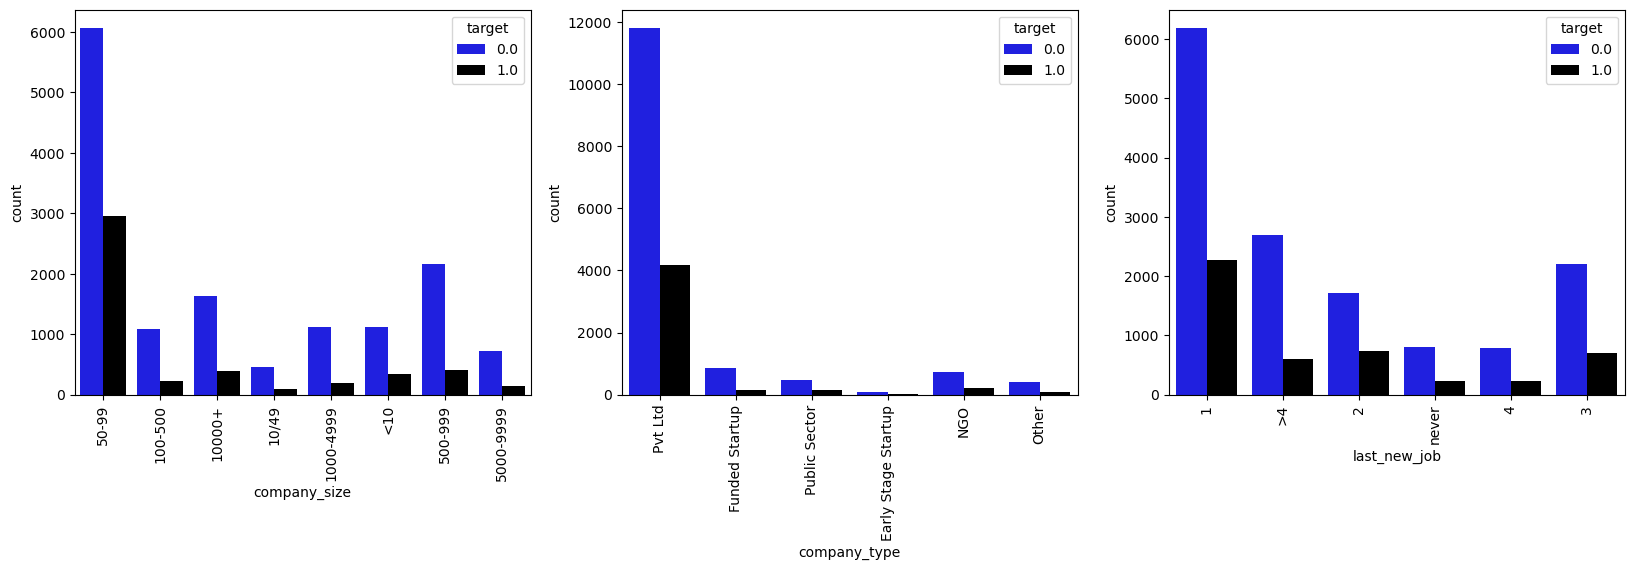

In [30]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,5))
sns.countplot(x="company_size",data=df,hue="target",ax=ax1,palette=["blue","black"])
ax1.set_xticklabels(labels=df.company_size.value_counts().index,rotation=90)
sns.countplot(x="company_type",data=df,hue="target",ax=ax2,palette=["blue","black"])
ax2.set_xticklabels(labels=df.company_type.value_counts().index,rotation=90)
sns.countplot(x="last_new_job",data=df,hue="target",ax=ax3,palette=["blue","black"])
ax3.set_xticklabels(labels=df.last_new_job.value_counts().index,rotation=90)

# **Label Encoding for Ordinal data**

In [31]:
le=LabelEncoder()
ordinal_cols=[ 'education_level',
       'major_discipline', 'experience', 'company_size',
       'last_new_job',"company_size"]
for column in ordinal_cols:
    df[column]=le.fit_transform(df[column])

# **One Hot Encoding for Nominal data**

In [32]:
df=pd.get_dummies(df,columns=['gender',
       'relevent_experience','enrolled_university','company_type'],drop_first=True)

In [33]:
df

,enrollee_id,city,city_development_index,education_level,major_discipline,experience,company_size,last_new_job,training_hours,target,gender_Male,gender_Other,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,8949,city_103,0.920,0,5,21,4,0,36,1.0,1,0,0,0,1,0,0,0,0,1
1,29725,city_40,0.776,0,5,6,4,4,47,0.0,1,0,1,0,1,0,0,0,0,1
2,11561,city_21,0.624,0,5,15,4,5,83,0.0,1,0,1,0,0,0,0,0,0,1
3,33241,city_115,0.789,0,1,20,4,5,52,1.0,1,0,1,0,1,0,0,0,0,1
4,666,city_162,0.767,2,5,21,4,3,8,0.0,1,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,0,2,5,4,0,42,1.0,1,0,1,0,1,0,0,0,0,1
19154,31398,city_103,0.920,0,5,5,4,3,52,1.0,1,0,0,0,1,0,0,0,0,1
19155,24576,city_103,0.920,0,5,21,4,3,44,0.0,1,0,0,0,1,0,0,0,0,1
19156,5756,city_65,0.802,1,5,20,5,1,97,0.0,1,0,0,0,1,0,0,0,0,1


In [34]:
X=df.drop(columns=["city","target","enrollee_id"])

In [35]:
X

,city_development_index,education_level,major_discipline,experience,company_size,last_new_job,training_hours,gender_Male,gender_Other,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,0.920,0,5,21,4,0,36,1,0,0,0,1,0,0,0,0,1
1,0.776,0,5,6,4,4,47,1,0,1,0,1,0,0,0,0,1
2,0.624,0,5,15,4,5,83,1,0,1,0,0,0,0,0,0,1
3,0.789,0,1,20,4,5,52,1,0,1,0,1,0,0,0,0,1
4,0.767,2,5,21,4,3,8,1,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,0.878,0,2,5,4,0,42,1,0,1,0,1,0,0,0,0,1
19154,0.920,0,5,5,4,3,52,1,0,0,0,1,0,0,0,0,1
19155,0.920,0,5,21,4,3,44,1,0,0,0,1,0,0,0,0,1
19156,0.802,1,5,20,5,1,97,1,0,0,0,1,0,0,0,0,1


In [36]:
y=df["target"]

In [37]:
y

0        1.0
1        0.0
2        0.0
3        1.0
4        0.0
        ... 
19153    1.0
19154    1.0
19155    0.0
19156    0.0
19157    0.0
Name: target, Length: 19158, dtype: float64

In [38]:
y.value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

# **Handling Imbalance data by Oversampling**

In [39]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
X,y=smote.fit_resample(X,y)

In [40]:
y.value_counts()

1.0    14381
0.0    14381
Name: target, dtype: int64

**Train test split**

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

# **Scaling the data**

In [42]:
#scaling the data
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# **DecisionTreeClassifier**

In [43]:
#train
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_prddt=dt.predict(X_test)


In [44]:
#performance check
print(classification_report(y_test,y_prddt))
cvs_dt=round(cross_val_score(dt,X,y,scoring="accuracy",cv=10).mean(),2)
print("Cross validation score for Decision Tree model is:",cvs_dt)

              precision    recall  f1-score   support

         0.0       0.77      0.75      0.76      3603
         1.0       0.76      0.77      0.76      3588

    accuracy                           0.76      7191
   macro avg       0.76      0.76      0.76      7191
weighted avg       0.76      0.76      0.76      7191

Cross validation score for Decision Tree model is: 0.76


Text(0.5, 1.0, 'Confusion matrix- Decision Tree')

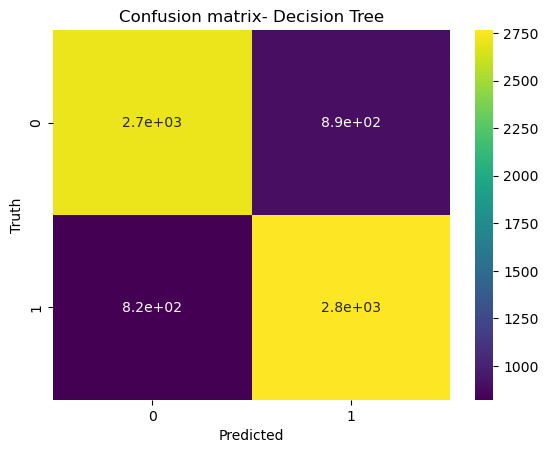

In [45]:
#confusion matrix
sns.heatmap(confusion_matrix(y_test,y_prddt),annot=True,cmap='viridis')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.title("Confusion matrix- Decision Tree")

# **Random Forest Classifier**

In [46]:
#train
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_prdrf=rf.predict(X_test)


In [47]:
#Performance check
print(classification_report(y_test,y_prdrf))
cvs_rf=round(cross_val_score(rf,X,y,scoring="accuracy",cv=10).mean(),2)
print("Cross validation score for Random Forest Classifier model is:",cvs_rf)

              precision    recall  f1-score   support

         0.0       0.80      0.80      0.80      3603
         1.0       0.80      0.80      0.80      3588

    accuracy                           0.80      7191
   macro avg       0.80      0.80      0.80      7191
weighted avg       0.80      0.80      0.80      7191

Cross validation score for Random Forest Classifier model is: 0.8


Text(0.5, 1.0, 'Confusion matrix- Random Forest Classifier')

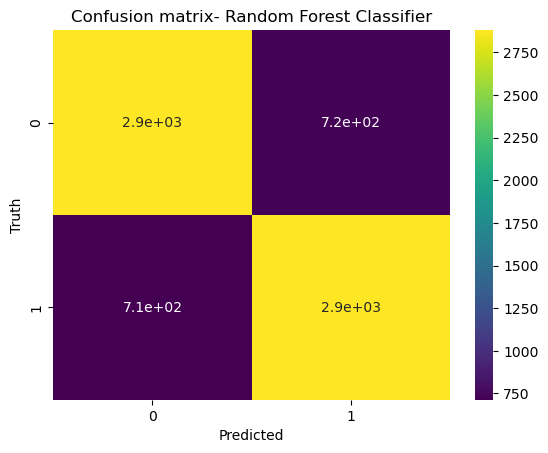

In [48]:
#confusion matrix
sns.heatmap(confusion_matrix(y_test,y_prdrf),annot=True,cmap='viridis')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.title("Confusion matrix- Random Forest Classifier")

# **GradientBoostingClassifier**

In [49]:
#train
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_prdgb=gb.predict(X_test)


In [50]:
#Performance check
print(classification_report(y_test,y_prdgb))
cvs_gb=round(cross_val_score(gb,X,y,scoring="accuracy",cv=10).mean(),2)
print("Cross validation score for Gradient Boosting calssifier model is:",cvs_gb)

              precision    recall  f1-score   support

         0.0       0.77      0.77      0.77      3603
         1.0       0.77      0.77      0.77      3588

    accuracy                           0.77      7191
   macro avg       0.77      0.77      0.77      7191
weighted avg       0.77      0.77      0.77      7191

Cross validation score for Gradient Boosting calssifier model is: 0.77


Text(0.5, 1.0, 'Confusion matrix- Gradient Boosting Classifier')

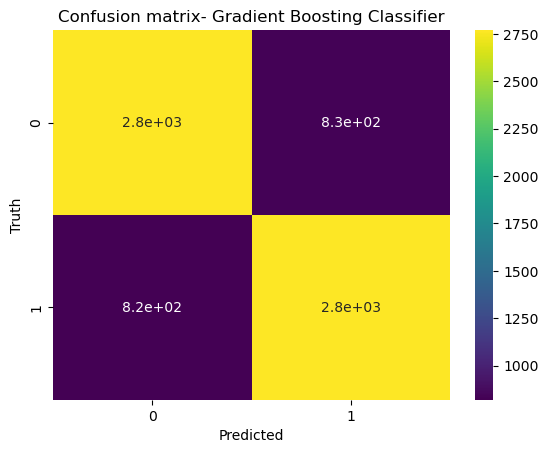

In [51]:
#confusion matrix
sns.heatmap(confusion_matrix(y_test,y_prdgb),annot=True,cmap='viridis')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.title("Confusion matrix- Gradient Boosting Classifier")

# **Comparison of results**

In [52]:
result=pd.DataFrame({"Model":[
     "Decision Tree Classifier", 
     "Random Forest Classifier",   
     "Gradient Boosting Classifier"],"CV Score":[cvs_dt,cvs_rf,cvs_gb]})

In [53]:
result

,Model,CV Score
0,Decision Tree Classifier,0.76
1,Random Forest Classifier,0.80
2,Gradient Boosting Classifier,0.77


#  **Handling the Test Data**

In [54]:
testdf=pd.read_csv("/kaggle/input/hr-analytics/aug_test.csv")

In [55]:
testdf.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [56]:
testdf.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64

In [57]:
for column in cat_columns:
    if testdf[column].isnull().sum()>0:
        testdf[column].replace(np.nan,testdf[column].mode()[0],inplace=True)

In [58]:
testdf.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64

In [59]:
le=LabelEncoder()
ordinal_cols=[ 'education_level',
       'major_discipline', 'experience', 'company_size',
       'last_new_job',"company_size"]
for column in ordinal_cols:
    testdf[column]=le.fit_transform(testdf[column])

In [60]:
testdf=pd.get_dummies(testdf,columns=['gender',
       'relevent_experience','enrolled_university','company_type'],drop_first=True)

In [61]:
testdf=testdf.drop(columns=["city","enrollee_id"])

In [62]:
testdf

,city_development_index,education_level,major_discipline,experience,company_size,last_new_job,training_hours,gender_Male,gender_Other,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,0.827,0,5,19,7,0,21,1,0,0,0,0,0,0,0,0,1
1,0.920,0,5,15,4,0,98,0,0,0,0,1,0,0,0,0,1
2,0.624,1,5,20,4,5,15,1,0,1,0,1,0,0,0,0,1
3,0.827,2,5,2,0,0,39,1,0,0,0,1,0,0,0,0,1
4,0.920,0,5,21,3,4,72,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,0.920,0,2,7,4,3,15,1,0,1,0,1,0,0,0,1,0
2125,0.897,2,5,9,4,1,30,1,0,0,0,1,0,0,0,0,1
2126,0.887,4,5,13,4,5,18,1,0,1,0,1,0,0,0,0,1
2127,0.804,1,5,17,1,0,84,1,0,0,0,0,0,0,0,1,0


In [63]:
testdf=scaler.transform(testdf)

In [64]:
predictions=rf.predict(testdf)

In [65]:
predictions

array([0., 0., 0., ..., 0., 0., 0.])

In [66]:
submission=pd.read_csv("/kaggle/input/hr-analytics/sample_submission.csv")

In [67]:
submission

,enrollee_id,target
0,32403,0.5
1,9858,0.5
2,31806,0.5
3,27385,0.5
4,27724,0.5
...,...,...
2124,1289,0.5
2125,195,0.5
2126,31762,0.5
2127,7873,0.5


In [68]:
submission.target=predictions

# **Final Submission**

In [69]:
submission

,enrollee_id,target
0,32403,0.0
1,9858,0.0
2,31806,0.0
3,27385,0.0
4,27724,0.0
...,...,...
2124,1289,0.0
2125,195,0.0
2126,31762,0.0
2127,7873,0.0
